In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.integrate import quad

In [42]:
# Functions
def H(a, Omega_m, Omega_DE, H0=72):
    H = H0 * np.sqrt(Omega_m * a**(-3) + Omega_DE + (1 - Omega_m - Omega_DE) * a**(-2))
    return H
        
def dv_lnH(a, Omega_m, Omega_DE):
    diff = -0.5 * ((3 * Omega_m * a**(-4) + 2 * (1 - Omega_m - Omega_DE) * a**(-3)) / (Omega_m * a**(-3) + Omega_DE + (1 - Omega_m - Omega_DE) * a**(-2)))
    return diff

def perturbation_growth(a, y, Omega_m, Omega_DE, H0=72):
    delta, dv_delta = y
    Ha = H(a, Omega_m, Omega_DE, H0)
    dvlnH = dv_lnH(a, Omega_m, Omega_DE)
    dv2_delta = -( dvlnH + 3/ a ) * dv_delta + (3 * Omega_m * H0 **2) / (2 * a **5 * Ha**2) * delta
    return [dv_delta, dv2_delta]

def D_1(a, Omega_m, Omega_DE, H0=72):
    prod = (5/2) * Omega_m * (H(a, Omega_m, Omega_DE, H0) / H0)
    def integrand(a_prime):
        integrand = 1 / (a_prime * H(a_prime, Omega_m, Omega_DE, H0) / H0)**3
        return integrand
    integral, _ = quad(integrand, 0, a)
    result = prod * integral
    return result

In [43]:
# Constants
components = {
    'Flat ($\Omega_m$, $\Omega_\Lambda$) = (1.0, 0.0)': {'Omega_m': 1.0, 'Omega_DE': 0.0, 'type': 'flat'},
    'Flat ($\Omega_m$, $\Omega_\Lambda$) = (0.3, 0.7)': {'Omega_m': 0.3, 'Omega_DE': 0.7, 'type': 'flat'},
    'Open ($\Omega_m$, $\Omega_\Lambda$) = (0.3, 0.0)': {'Omega_m': 0.3, 'Omega_DE': 0.0, 'type': 'open'}
}

In [44]:
# Initial conditions
a_init = 1e-3  # Initial scale factor (early universe)
a_final = 1.0   # Final scale factor (present day)
delta_init = 1e-3  # Initial perturbation
dv_delta_init = 1.0  # Initial derivative of perturbation

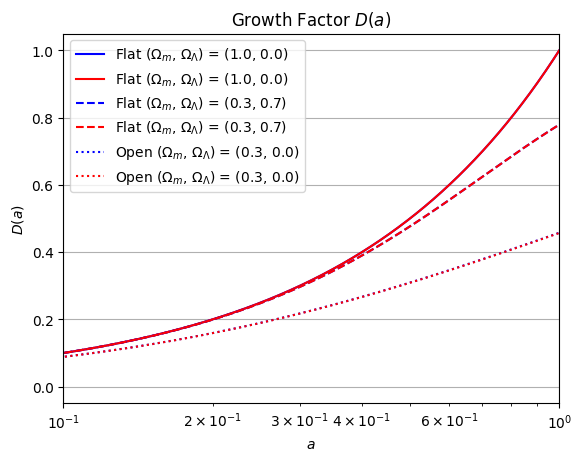

In [45]:
for comp_name, params in components.items():
    y = [delta_init, dv_delta_init]
    a = np.linspace(a_init, a_final, 1000)
    sol = solve_ivp(perturbation_growth, [a_init, a_final], [delta_init, dv_delta_init], 
                t_eval=a, args=(params['Omega_m'], params['Omega_DE'], 72))
    a_values = sol.t
    D_values = sol.y[0]
    D1_values = [D_1(a, params['Omega_m'], params['Omega_DE'], 72) for a in a_values]
    
    if comp_name == 'Flat ($\Omega_m$, $\Omega_\Lambda$) = (1.0, 0.0)':
        plt.semilogx(a_values, D_values, label=f'{comp_name}', c='blue')
        plt.semilogx(a_values, D1_values, label=f'{comp_name}', c='red')
    if comp_name == 'Flat ($\Omega_m$, $\Omega_\Lambda$) = (0.3, 0.7)':
        plt.semilogx(a_values, D_values, label=f'{comp_name}', linestyle='--', c='blue')
        plt.semilogx(a_values, D1_values, label=f'{comp_name}', linestyle='--', c='red')
    if comp_name == 'Open ($\Omega_m$, $\Omega_\Lambda$) = (0.3, 0.0)':
        plt.semilogx(a_values, D_values, label=f'{comp_name}', linestyle='dotted', c='blue')
        plt.semilogx(a_values, D1_values, label=f'{comp_name}', linestyle='dotted', c='red')
plt.xlabel('$a$')
plt.ylabel('$D(a)$')
plt.xlim(0.1, 1)
plt.title('Growth Factor $D(a)$')
plt.legend()
plt.grid(True)
plt.savefig('growth_factor.png', dpi=240)
plt.show()